<a href="https://colab.research.google.com/github/Katilla31/python-challenge-alura-store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = [loja1, loja2, loja3, loja4]
lojas_grafico = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [147]:
faturamento_loja1 = loja1['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print("Faturamento da Loja 1: R$ {:,.2f}".format(faturamento_loja1).replace(',', 'v').replace('.', ',').replace('v', '.'))
print("Faturamento da Loja 2: R$ {:,.2f}".format(faturamento_loja2).replace(',', 'v').replace('.', ',').replace('v', '.'))
print("Faturamento da Loja 3: R$ {:,.2f}".format(faturamento_loja3).replace(',', 'v').replace('.', ',').replace('v', '.'))
print("Faturamento da Loja 4: R$ {:,.2f}".format(faturamento_loja4).replace(',', 'v').replace('.', ',').replace('v', '.'))

Faturamento da Loja 1: R$ 1.534.509,12
Faturamento da Loja 2: R$ 1.488.459,06
Faturamento da Loja 3: R$ 1.464.025,03
Faturamento da Loja 4: R$ 1.384.497,58


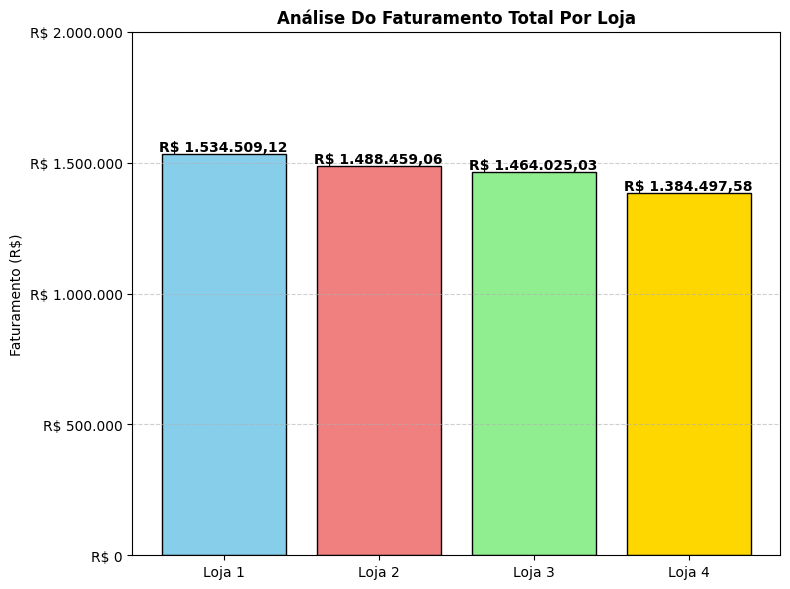

O menor faturamento total é o da Loja 4 com: R$ 1.384.497,58


In [148]:
from matplotlib.ticker import FuncFormatter

def formatar_milhar(x, pos):
    'Formata o valor com ponto para milhar e vírgula para decimal.'
    return f'R$ {x:,.0f}'.replace(',', 'v').replace('.', ',').replace('v', '.')

faturamento_total = faturamento_loja1 + faturamento_loja2 + faturamento_loja3 + faturamento_loja4

lojas_grafico = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamento = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
cores = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

plt.figure(figsize=(8, 6))
plt.bar(lojas_grafico, faturamento, color=cores, edgecolor='black')

plt.title('Análise Do Faturamento Total Por Loja', fontweight = 'bold', color = 'black')
plt.ylabel('Faturamento (R$)')

plt.yticks(range(0, int(max(faturamento)) + 500000, 500000))

plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_milhar))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

for i, valor in enumerate(faturamento):

    plt.text(i, valor ,f'R$ {valor:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'), ha='center', va='bottom', fontsize = 10, fontweight = 'bold', color = 'black')


plt.show()

print("O menor faturamento total é o da Loja 4 com: R$ {:,.2f}".format(faturamento_loja4).replace(',', 'v').replace('.', ',').replace('v', '.'))

# 2. Vendas por Categoria


In [149]:
from IPython.display import display, Markdown

def somar_por_categoria(loja_df, categorias):
    valores = []
    for categoria in categorias:
        total = round(loja_df[loja_df['Categoria do Produto'] == categoria]['Preço'].sum(), 2)
        valores.append(total)
    return valores

categorias = np.array(loja1['Categoria do Produto'].unique())
valores = np.array([somar_por_categoria(loja, categorias) for loja in lojas])

df = pd.DataFrame(valores, columns=categorias, index=lojas_grafico)

def formatar_real(valor):
    return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

df_estilizado = df.style.format(formatar_real).set_caption(
    "<h2 style='font-weight: bold; font-size: 1.5em;'>Vendas Por Categoria</h2>"
)

display(df_estilizado)

,eletronicos,moveis,brinquedos,eletrodomesticos,utilidades domesticas,esporte e lazer,livros,instrumentos musicais
Loja 1,"R$ 572.659,23","R$ 250.178,11","R$ 23.993,78","R$ 484.913,36","R$ 16.931,48","R$ 52.387,55","R$ 11.713,92","R$ 121.731,69"
Loja 2,"R$ 547.773,71","R$ 235.234,68","R$ 21.262,21","R$ 464.758,13","R$ 19.662,86","R$ 46.326,09","R$ 13.454,35","R$ 139.987,03"
Loja 3,"R$ 547.699,92","R$ 268.095,56","R$ 25.869,20","R$ 438.984,89","R$ 20.080,21","R$ 47.456,10","R$ 12.664,70","R$ 103.174,45"
Loja 4,"R$ 545.966,86","R$ 256.705,65","R$ 27.015,67","R$ 377.680,65","R$ 20.098,83","R$ 44.465,65","R$ 12.427,77","R$ 100.136,50"


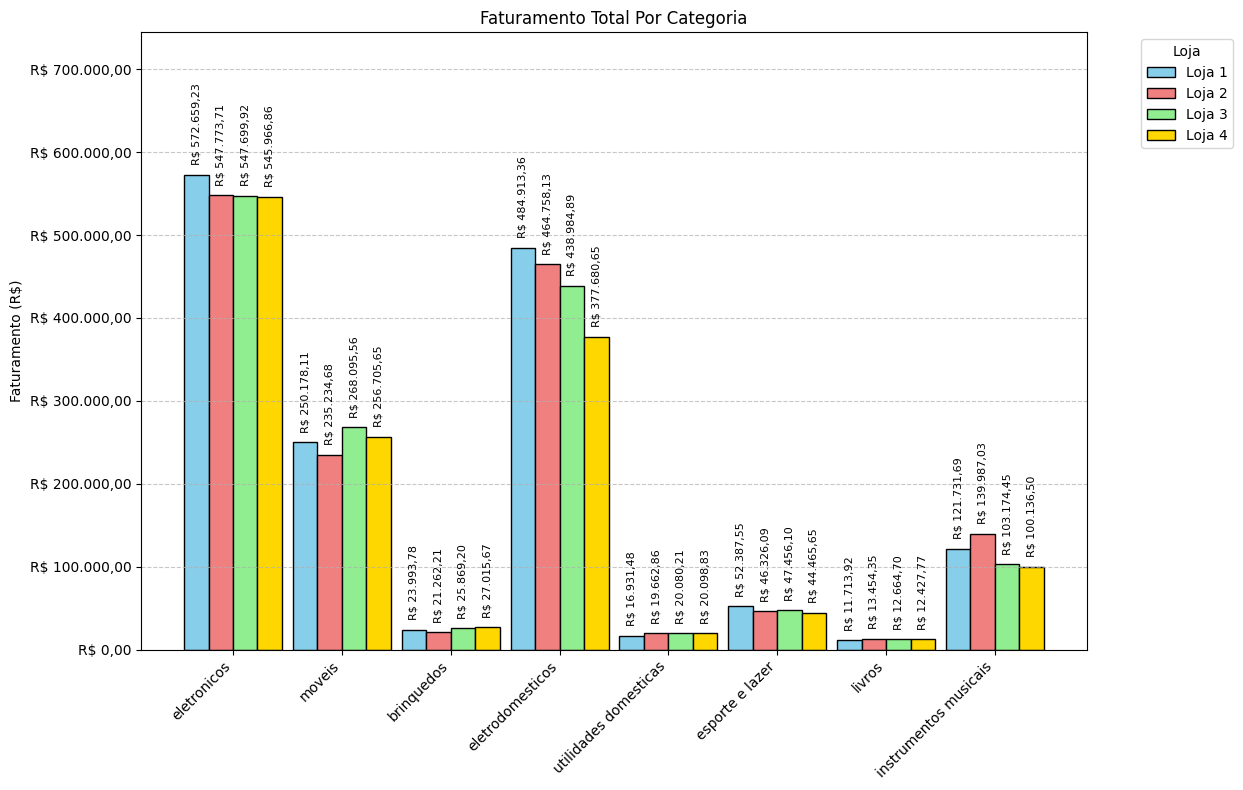

In [150]:
from matplotlib.ticker import FuncFormatter

categorias = df.columns.tolist()
lojas_grafico_barras = df.index.tolist()

n_categorias = len(categorias)
n_lojas = len(lojas_grafico_barras)

indice = np.arange(n_categorias)
largura = 0.9 / n_lojas

cores = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

fig, ax = plt.subplots(figsize=(14, 8))

for i, loja_nome in enumerate(lojas_grafico_barras):
    bars=ax.bar(indice + (i - n_lojas/2 + 0.5) * largura,
            df.loc[loja_nome],
            width=largura,
            label=loja_nome,
            color=cores[i % len(cores)],
            edgecolor='black')

    for bar in bars:
        yval = bar.get_height()
        if yval > 0:
            texto_formatado = f"R$ {yval:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

            ax.text(bar.get_x() + bar.get_width() / 2,
                     yval + (df.values.max() * 0.02),
                     texto_formatado,
                     ha='center', va='bottom', fontsize=8, color='black', rotation=90)

def formatar_valor_eixo_y(valor, pos):
      return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

formatter = FuncFormatter(formatar_valor_eixo_y)
ax.yaxis.set_major_formatter(formatter)

plt.ylabel('Faturamento (R$)')
plt.title('Faturamento Total Por Categoria')
plt.xticks(indice, categorias, rotation=45, ha='right')
plt.legend(title='Loja', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, df.values.max() * 1.3)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

# 3. Média de Avaliação das Lojas

In [151]:
def media_avaliacao(loja):
    media = round(loja['Avaliação da compra'].mean(),2)
    return media

avaliacoes = np.array([media_avaliacao(loja) for loja in lojas])

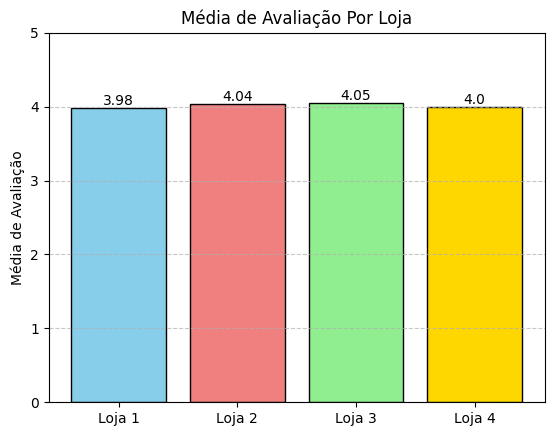

In [152]:
cores = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
plt.bar(lojas_grafico, avaliacoes, color= cores, edgecolor = 'black')

plt.title('Média de Avaliação Por Loja')
plt.ylabel('Média de Avaliação')
plt.ylim(0, 5)

for i, valor in enumerate(avaliacoes):
    plt.text(i, valor , str(valor), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# 4. Produtos Mais e Menos Vendidos

In [153]:
from IPython.display import display, Markdown

lojas=[loja1,loja2,loja3,loja4]

lojas_unificadas = pd.concat(lojas)

produtos_vendidos = lojas_unificadas.groupby('Produto')['Quantidade de parcelas'].sum().sort_values(ascending=False)

produtos_mais_vendidos = produtos_vendidos.head(10)

produtos_menos_vendidos = produtos_vendidos.tail(10)

df_mais_vendidos = produtos_mais_vendidos.reset_index()
df_mais_vendidos.columns = ['Produto', 'Quantidade']

df_mais_vendidos_estilizado = df_mais_vendidos.style.set_caption(
    "<h3>Produtos Mais Vendidos</h3>"
)

display(df_mais_vendidos_estilizado)

df_menos_vendidos = produtos_menos_vendidos.reset_index()
df_menos_vendidos.columns = ['Produto', 'Quantidade']

df_menos_vendidos_estilizado = df_menos_vendidos.style.set_caption(
    "<h3>Produtos Menos Vendidos</h3>"
)

display(df_menos_vendidos_estilizado)

,Produto,Quantidade
0,Secadora de roupas,649
1,Cômoda,627
2,Pandeiro,625
3,Bicicleta,614
4,Celular Plus X42,611
5,Cama king,603
6,Jogo de panelas,601
7,Micro-ondas,600
8,Bateria,595
9,Violão,595


,Produto,Quantidade
0,Guitarra,497
1,Tablet ABXY,497
2,Cubo mágico 8x8,487
3,Boneca bebê,474
4,Mochila,471
5,Mesa de centro,469
6,Dinossauro Rex,458
7,Celular ABXY,447
8,Jogo de copos,435
9,Smartwatch,432


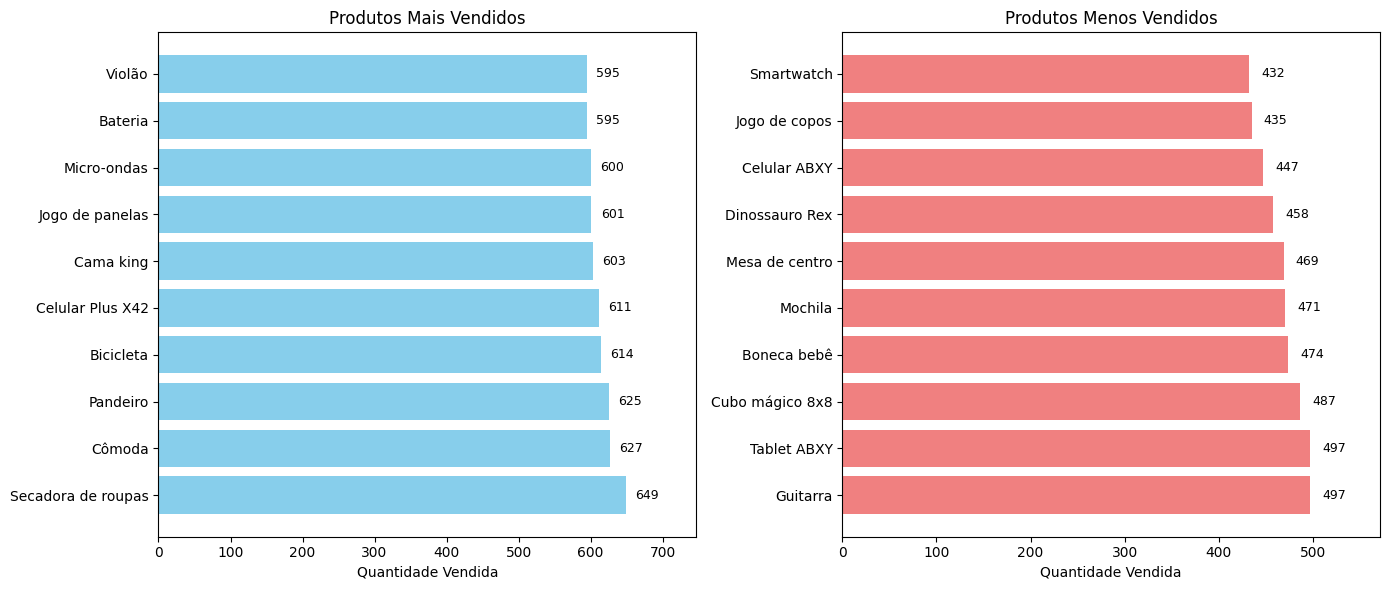

In [154]:
lojas=[loja1,loja2,loja3,loja4]

lojas_unificadas = pd.concat(lojas)

produtos_vendidos = lojas_unificadas.groupby('Produto')['Quantidade de parcelas'].sum().sort_values(ascending=False)
produtos_vendidos_top = produtos_vendidos.head(10)
produtos_vendidos_bottom = produtos_vendidos.tail(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
bars_top = ax1.barh(produtos_vendidos_top.index, produtos_vendidos_top.values, color='skyblue')
ax1.set_xlabel('Quantidade Vendida')
ax1.set_title('Produtos Mais Vendidos')

for bar in bars_top:
    xval = bar.get_width()
    yval = bar.get_y() + bar.get_height() / 2
    ax1.text(xval + (produtos_vendidos.max() * 0.02),
             yval, f'{xval:.0f}', va='center', ha='left', fontsize=9)
ax1.set_xlim(0, produtos_vendidos_top.max() * 1.15)

ax2.barh(produtos_vendidos_bottom.index, produtos_vendidos_bottom.values, color='lightcoral')
ax2.set_xlabel('Quantidade Vendida')
ax2.set_title('Produtos Menos Vendidos')
for bar in ax2.patches:
    xval = bar.get_width()
    yval = bar.get_y() + bar.get_height() / 2
    ax2.text(xval + (produtos_vendidos.max() * 0.02),
             yval, f'{xval:.0f}', va='center', ha='left', fontsize=9)
ax2.set_xlim(0, produtos_vendidos_bottom.max() * 1.15)


plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


Frete médio da Loja 1: R$ 34.69
Frete médio da Loja 2: R$ 33.62
Frete médio da Loja 3: R$ 33.07
Frete médio da Loja 4: R$ 31.28


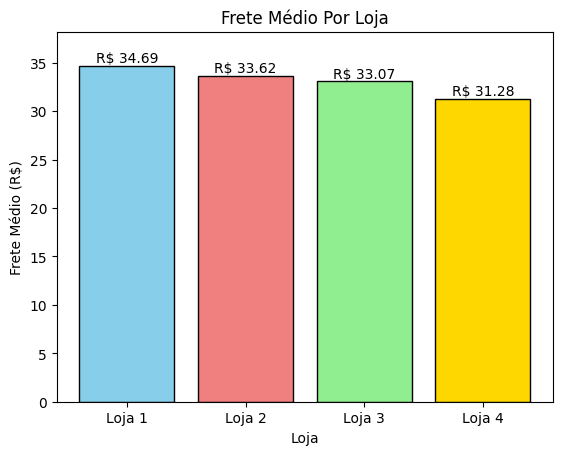

In [155]:
lojas_df = [loja1, loja2, loja3, loja4]
frete = np.array([loja['Frete'].mean() for loja in lojas_df])

print(f'Frete médio da Loja 1: R$ {frete[0]:.2f}')
print(f'Frete médio da Loja 2: R$ {frete[1]:.2f}')
print(f'Frete médio da Loja 3: R$ {frete[2]:.2f}')
print(f'Frete médio da Loja 4: R$ {frete[3]:.2f}')

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
cores = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

plt.bar(lojas, frete, color=cores, edgecolor='black')
plt.title('Frete Médio Por Loja')
plt.ylabel('Frete Médio (R$)')
plt.ylim(0, frete.max() * 1.1)
plt.xlabel('Loja')

for bar in plt.gca().patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'R$ {yval:.2f}', ha='center', va='bottom')

plt.show()

# **Relatório Final**

Com base nos dados e insights obtidos, é possível destacar os seguintes pontos:

**Faturamento:** A Loja 1 possui o maior faturamento entre as quatro unidades. As Lojas 2 e 3 apresentam valores semelhantes entre si, enquanto a Loja 4 registra o menor desempenho nesse aspecto.

**Vendas Por Categoria:** A Loja 1 se destaca nas vendas de eletrodomésticos e eletrônicos. A Loja 2 lidera em instrumentos musicais, e a Loja 3 mostra melhor desempenho na categoria de móveis.

**Avaliações:** Embora as avaliações gerais sejam próximas, a Loja 3 apresenta a melhor média (4,5), seguida pela Loja 2 (4,4). A Loja 4 tem nota 4,0, e a Loja 1, a mais baixa, com 3,98.

**Frete médio:** A Loja 1 possui o maior custo médio de frete, enquanto a Loja 4 apresenta o menor. Isso pode estar relacionado ao menor número de compras na Loja 4, o que contrasta com a Loja 1, onde ocorrem mais compras.

# **Conclusão**
Após a análise dos critérios requeridos, verificou-se que a Loja 4 é a que apresenta o menor faturamento de vendas total. Além disso, apesar de possuir o menor frete médio entre as lojas analisadas, considera-se, que isso pode indicar um volume de vendas mais baixo.Ademais, mesmo que não tenha a pior avaliação entre as lojas, sua nota não está muito distante da média das demais.
Além disso, não lidera em vendas na maioria das categorias — destacando-se apenas em brinquedos e utilidades domésticas, mas ainda assim, com valores próximos aos das outras lojas, nem sendo essas as categorias com vendas mais expresssiva entre todas as ofertadas pela rede.

Diante disso, com base em todos os dados analisados e informações levantadas, verificou-se que a Loja 4 é a que apresenta a menor eficiência entre todas as lojas da rede Alura Store, recomendando-se portanto, a sua venda ao senhor João, para que ele possa iniciar um novo empreedimento.